In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [11]:
df=pd.read_csv("solar_power_output(in).csv")
df

,temperature,humidity,solar_irradiance,wind_speed,solar_power_output
0,19.363503,75.852937,266.619636,5.190818,128.101772
1,33.767858,62.887709,587.710853,4.791819,290.911789
2,28.299849,44.762209,885.651252,0.256421,442.336390
3,24.966462,85.103602,759.002398,3.412478,380.261988
4,13.900466,74.778494,825.905033,3.801956,415.931953
...,...,...,...,...,...
495,18.833806,27.326566,701.391519,6.569552,352.480220
496,24.591403,93.385086,657.541311,9.566146,326.834297
497,11.943366,30.945490,517.144639,0.689580,259.133251
498,34.359870,96.018988,441.807202,0.570547,223.778240


In [12]:
X=df[['temperature','humidity','solar_irradiance','wind_speed']]
y=df['solar_power_output']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=model.predict(X_test)

In [16]:
y_pred

array([145.57713107,  58.80813609, 162.02529474, 389.82145928,
       499.91950595, 201.02821571, 280.32773309, 343.94995965,
       207.65845172, 274.08855806, 270.4758993 ,  71.45181395,
       429.27171131, 474.93452179, 131.00879231, 488.72382533,
       351.97648481,  66.01156112, 286.53039282, 315.26996556,
       156.25649584, 217.68415496, 328.50926609, 456.09724416,
       224.59964917, 343.33441392, 258.65661936, 253.27035923,
       487.33886963, 488.13938701, 352.87341422, 139.35221978,
       486.24574421, 166.59050111, 443.99714231, 498.93693594,
       440.23818943, 184.21480103, 497.81182989, 239.22808164,
       345.26650268, 281.3410799 , 215.84679473, 472.53738058,
       105.19383875, 353.92961077, 132.62179773, 496.30985098,
       472.03357269, 464.32390433,  68.39576649, 337.05784427,
       271.45779666, 142.00782193, 330.57420012, 209.16463828,
       431.33413853, 460.52547819, 271.68335515, 148.17216827,
       322.32496319, 189.54364633, 148.80585847,  54.32

In [17]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Square Error: {mse}")
print(f"R-squared: {r2}")

Mean Square Error: 29.462345965626305
R-squared: 0.9983255901418433


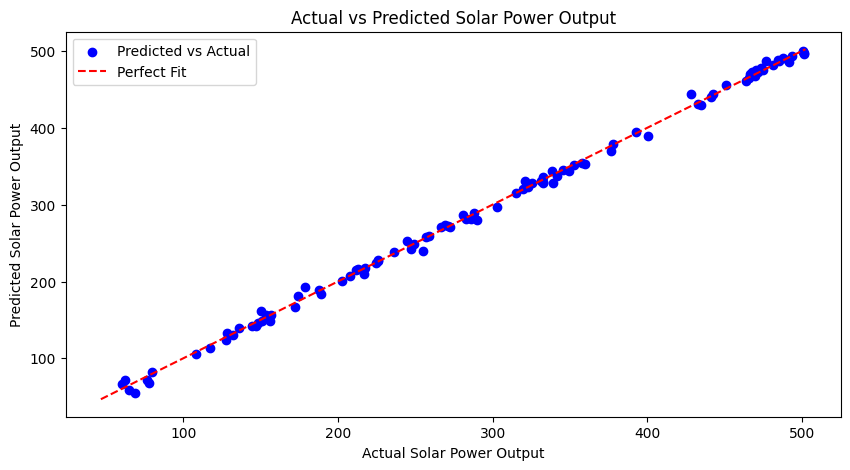

In [18]:
import matplotlib.pyplot as plt

# Scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Diagonal Line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual Solar Power Output")
plt.ylabel("Predicted Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output")
plt.legend()
plt.show()

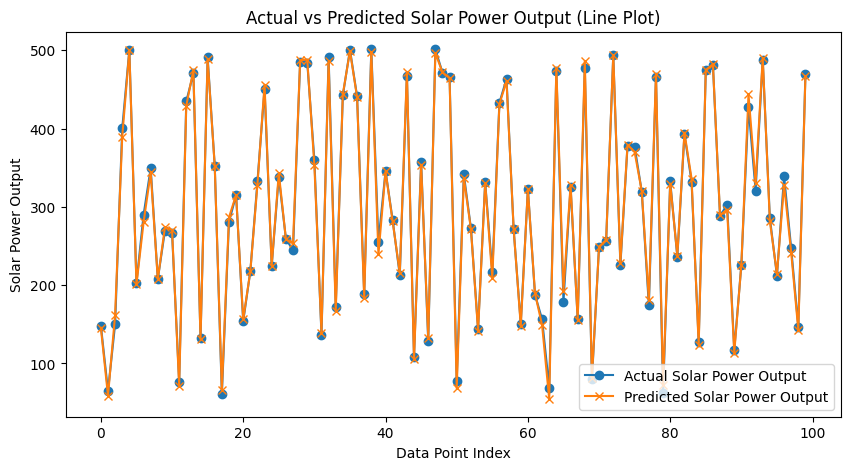

In [19]:
# Line plot to show predictions and actual values
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label="Actual Solar Power Output", marker='o')
plt.plot(range(len(y_test)), y_pred, label="Predicted Solar Power Output", marker='x')
plt.xlabel("Data Point Index")
plt.ylabel("Solar Power Output")
plt.title("Actual vs Predicted Solar Power Output (Line Plot)")
plt.legend()
plt.show()

In [20]:
# Save the trained model
joblib.dump(model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [21]:
# Load the saved model
model = joblib.load('solar_power_prediction_model.pkl')

# New input data for prediction
# Example input (temperature, humidity, solar_irradiance, wind_speed)
new_data = np.array([[19.36, 75.85, 266.61, 5.19]])

# Predict solar power output
predicted_output = model.predict(new_data)
print(f"Predicted Solar Power Output: {predicted_output[0]} watts")

Predicted Solar Power Output: 132.61670573106247 watts


C:\Users\RENUKA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
# Get user input
temp = float(input("Enter the temperature (°C): "))
humidity = float(input("Enter the humidity (%): "))
irradiance = float(input("Enter the solar irradiance (W/m²): "))
wind_speed = float(input("Enter the wind speed (m/s): "))

# Prepare input data
new_data = np.array([[temp, humidity, irradiance, wind_speed]])

# Predict solar power output
predicted_output = model.predict(new_data)
print(f"\n🔋 The predicted solar power output is: {predicted_output[0]:.6f} watts")

Enter the temperature (°C):  19.789
Enter the humidity (%):  45.9867
Enter the solar irradiance (W/m²):  687.0875
Enter the wind speed (m/s):  129.546



🔋 The predicted solar power output is: 351.816222 watts


C:\Users\RENUKA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
